[mean imputation is bad](https://www.theanalysisfactor.com/mean-imputation/#:~:text=Problem%20%231%3A%20Mean%20imputation%20does,of%20the%20mean%20remains%20unbiased.)

theoritically, median imputation is bad but less severe than mean.

ignore the right side of the plots. in reality , engineer do not handle missing values on target.

the MAE below is based on `y_true=y_lin_act` and not `y_true=df['y']`. This is because the goal is to find the effect of median / mean imputation, drop missing values and not to find the best method to handle missing values.

in reality, MAE will be based on `y_true=df['y']`.

recommendation:
1. compare the MAE between (mean, median, drop, etc), use `y_true=df['y']`

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

,X
mean,51.535607
median,25.176579
skew,0.993071


handling missing values in X with mean. MAE 1.20
handling missing values in X with median. MAE 1.01
handling missing values in X with drop. MAE 0.65
handling missing values in y with mean. MAE 1.23
handling missing values in y with median. MAE 1.31
handling missing values in y with drop. MAE 0.65


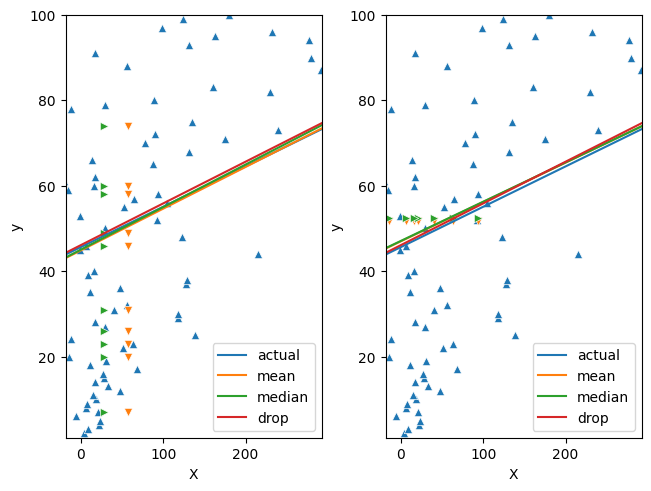

In [93]:
rnd = np.random.RandomState(0)

df = pd.DataFrame(
    data={
        # noise
        # reference: https://stackoverflow.com/questions/14058340/adding-noise-to-a-signal-in-python
        'X': np.arange(1,101,1) * rnd.normal(1,2,100),
        'y': np.arange(1,101,1)
    }
)

display(df[['X']].agg(['mean', 'median', 'skew']))

lin_act = LinearRegression().fit(X=df[['X']], y=df['y'])
y_lin_act = lin_act.predict(df[['X']])

drop_indices = rnd.choice(df.index, 10, replace=False)

fig, axs = plt.subplots(1,2, layout="constrained")

for column, ax in zip(['X', 'y'], axs.ravel()):
    # zoom
    # reference: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axes_margins.html
    ax.margins(x=-0.25, y=0.0)

    sns.scatterplot(data=df, x='X', y='y', marker='^', ax=ax)
    sns.lineplot(x=df['X'], y=y_lin_act, ax=ax, label='actual')

    # mean/median imputation

    ## mean imputation
    df_mea = df.copy()
    df_mea[column] = df_mea[column].drop(index=drop_indices)
    df_mea[column].fillna(df_mea[column].mean(), inplace=True)
    sns.scatterplot(data=df_mea.iloc[drop_indices], x='X', y='y', marker='v', ax=ax)

    lin_mea = LinearRegression().fit(X=df_mea[['X']], y=df_mea['y'])
    y_lin_mea = lin_mea.predict(df_mea[['X']])
    sns.lineplot(x=df_mea['X'], y=y_lin_mea, ax=ax, label='mean')
    print('handling missing values in {0} with {1}. MAE {2:.2f}'
        .format(column, 
                "mean", 
                mean_absolute_error(y_true=y_lin_act, y_pred=y_lin_mea)))

    ## median imputation
    df_med = df.copy()
    df_med[column] = df_med[column].drop(index=drop_indices)
    df_med[column].fillna(df_med[column].median(), inplace=True)
    sns.scatterplot(data=df_med.iloc[drop_indices], x='X', y='y', marker='>', ax=ax)

    lin_med = LinearRegression().fit(X=df_med[['X']], y=df_med['y'])
    y_lin_med = lin_med.predict(df_med[['X']])
    sns.lineplot(x=df_med['X'], y=y_lin_med, ax=ax, label='median')
    print('handling missing values in {0} with {1}. MAE {2:.2f}'
        .format(column, 
                "median", 
                mean_absolute_error(y_true=y_lin_act, y_pred=y_lin_med)))

    ## no imputation
    df_drop = df.copy()
    df_drop[column] = df_drop[column].drop(index=drop_indices)
    df_drop.dropna(axis=0, inplace=True)

    lin_drop = LinearRegression().fit(X=df_drop[['X']], y=df_drop['y'])
    y_lin_drop = lin_drop.predict(df_drop[['X']])
    sns.lineplot(x=df_drop['X'], y=y_lin_drop, ax=ax, label='drop')
    print('handling missing values in {0} with {1}. MAE {2:.2f}'
        .format(column, 
                "drop", 
                mean_absolute_error(y_true=np.delete(arr=y_lin_act, obj=drop_indices), y_pred=y_lin_drop)))